# 共享单车项目

1. 项目概况
  * 1.1 项目背景
  * 1.2 项目需求
2. 理解数据
  * 2.1 采集数据
  * 2.2 导入数据
  * 2.3 理解数据
3. 数据清洗及可视化分析
  * 3.1 数据清洗
  * 3.2 数值型变量相关性及可视化分析
  * 3.3 分类变量可视化分析

# 1. 提出问题


### 1.1 项目背景

    自行车共享系统是租赁自行车的一种方式。目前，全世界有超过500个自行车共享计划。
    kaggle网站共享单车项目提供了美国某城市的共享单车2011年到2012年的数据集，训练集由每月的前19天的共享单车租用情况数据组成，测试集由20号至月底的共享单车租用情况数据组成。

### 1.2 项目需求

    对训练数据进行数据清洗及可视化分析。

# 2. 理解数据

## 2.1 采集数据
从kaggle共享单车项目页面下载数据：https://www.kaggle.com/c/bike-sharing-demand/data

## 2.2 导入数据

In [1]:
#导入数据处理包
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#导入数据
#导入训练数据
train=pd.read_csv('./all-bike/train.csv')
#导入测试数据
test=pd.read_csv('./all-bike/test.csv')

## 2.3 理解数据

In [3]:
#查看数据集的大小
print('训练数据集的大小为：',train.shape,',测试数据集的大小为：',test.shape)

训练数据集的大小为： (10886, 12) ,测试数据集的大小为： (6493, 9)


In [4]:
#查看训练数据集和测试数据集的列名
print('训练数据集的列名为：',train.columns)
print('测试数据集的列名为：',test.columns)

训练数据集的列名为： Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
测试数据集的列名为： Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


### 由上可知，训练数据集相比测试数据集多的三列为：'casual','registered'和'count'

### 注：由于本次报告的目的是进行数据的可视化分析，因此，以后的数据将仅对训练数据加以分析。

In [5]:
#查看训练数据集的前五行
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
#查看数据集的描述统计信息
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
#查看数据集的类型和数据总数
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


### 变量理解


* datatime - 日期+时间
* season  -1=春天 2=夏天 3=秋天 4=冬天
* holiday - 是否是节假日
* workingday - 1=工作日 0=周末
* weather - 1：晴天，多云  2：薄雾，少云  3：小雪，小雨  4：大雨，大雪，大雾
* temp -  气温  摄氏度
* atemp -  体感温度
* humidity - 湿度
* windspeed - 风速
* casual - 非注册用户个数
* registered - 注册用户个数
* count - 给定日期时间（每小时）总租车人数
---
### 数据类型
 * 时间序列数据：datetime
 * 分类型数据：season, holiday, workingday,weather
 * 数值型数据：temp, atemp, humidity, windspeed, casual,registered,count

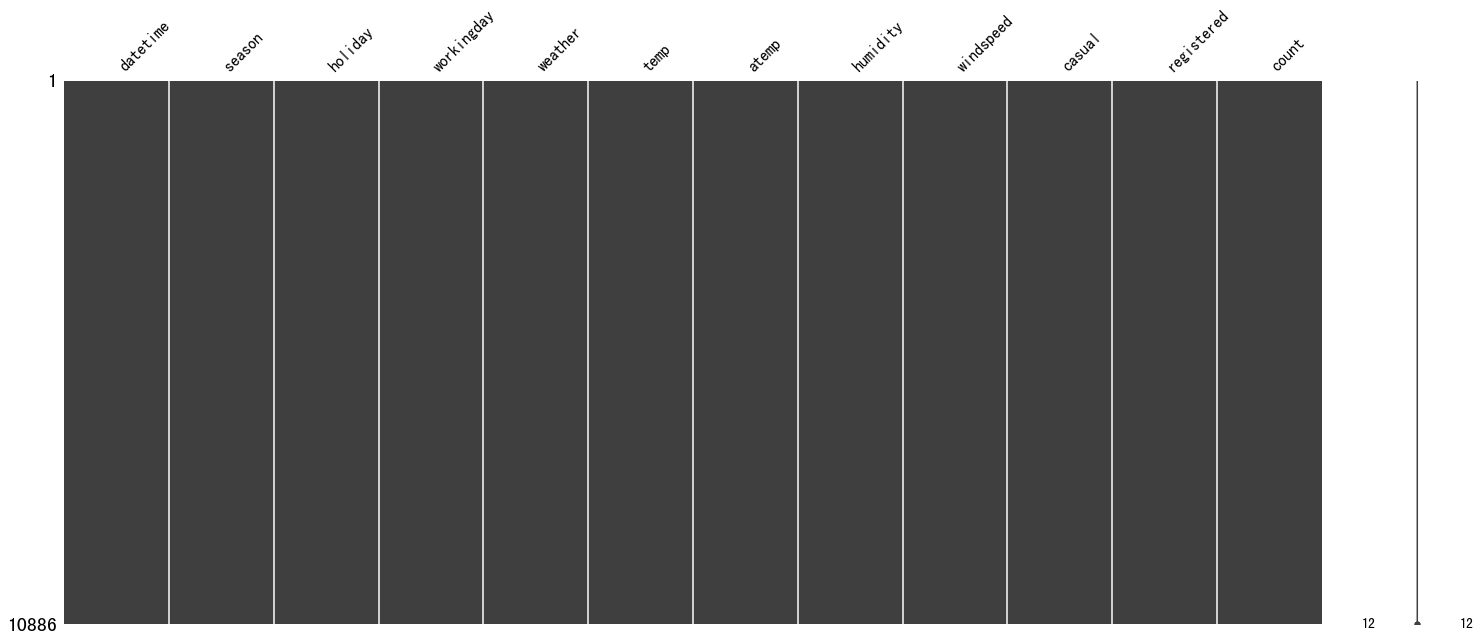

In [8]:
#查看训练数据缺失信息
msno.matrix(train)

### 由上可知，训练数据不存在缺失值。

# 3 数据清洗及可视化分析

## 3.1 数据清洗

 ###  根据'datetime'列增加新的列

In [9]:
#定义数据框，存放提取后的特征
timeDf=pd.DataFrame()
#提取日期
timeDf['date']=train['datetime'].apply(lambda x:x.split(' ')[0])
#提取小时
timeDf['hour']=train['datetime'].apply(lambda x:x.split(' ')[1].split(':')[0]).astype(int)
#提取月份
timeDf['month']=timeDf['date'].apply(lambda x:x.split('-')[1]).astype(int)
#提取该天为星期几
timeDf['weekday']=train['datetime'].apply(lambda x:pd.to_datetime(x).weekday()).astype(int)
timeDf.head()

,date,hour,month,weekday
0,2011-01-01,0,1,5
1,2011-01-01,1,1,5
2,2011-01-01,2,1,5
3,2011-01-01,3,1,5
4,2011-01-01,4,1,5


In [10]:
timeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 4 columns):
date       10886 non-null object
hour       10886 non-null int32
month      10886 non-null int32
weekday    10886 non-null int32
dtypes: int32(3), object(1)
memory usage: 212.7+ KB


In [11]:
#将进行日期格式转换后的数据框添加到train数据集中
train=pd.concat([train,timeDf],axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,5


### 删除多余列

In [12]:
#删除datetime列
train.drop('datetime',axis=1,inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null int32
month         10886 non-null int32
weekday       10886 non-null int32
dtypes: float64(3), int32(3), int64(8), object(1)
memory usage: 1.1+ MB


### 将数字转换成相应的类别名称

In [14]:
#列名重命名
from collections import OrderedDict
train['season']=train['season'].map({1:'春季',2:'夏季',3:'秋季',4:'冬季'})
train['workingday']=train['workingday'].map({0:'非工作日',1:'工作日'})
train['weekday']=train['weekday'].map({0:'星期一',1:'星期二',2:'星期三',3:'星期四',4:'星期五',5:'星期六',6:'星期日'})
train['weather']=train['weather'].map({1:'晴天,多云',2:'薄雾,少云',3:'小雪,小雨',4:'大雪,大雨,大雾'})
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,weekday
0,春季,0,非工作日,"晴天,多云",9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,星期六
1,春季,0,非工作日,"晴天,多云",9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,星期六
2,春季,0,非工作日,"晴天,多云",9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,星期六
3,春季,0,非工作日,"晴天,多云",9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,星期六
4,春季,0,非工作日,"晴天,多云",9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,星期六


### 异常值处理

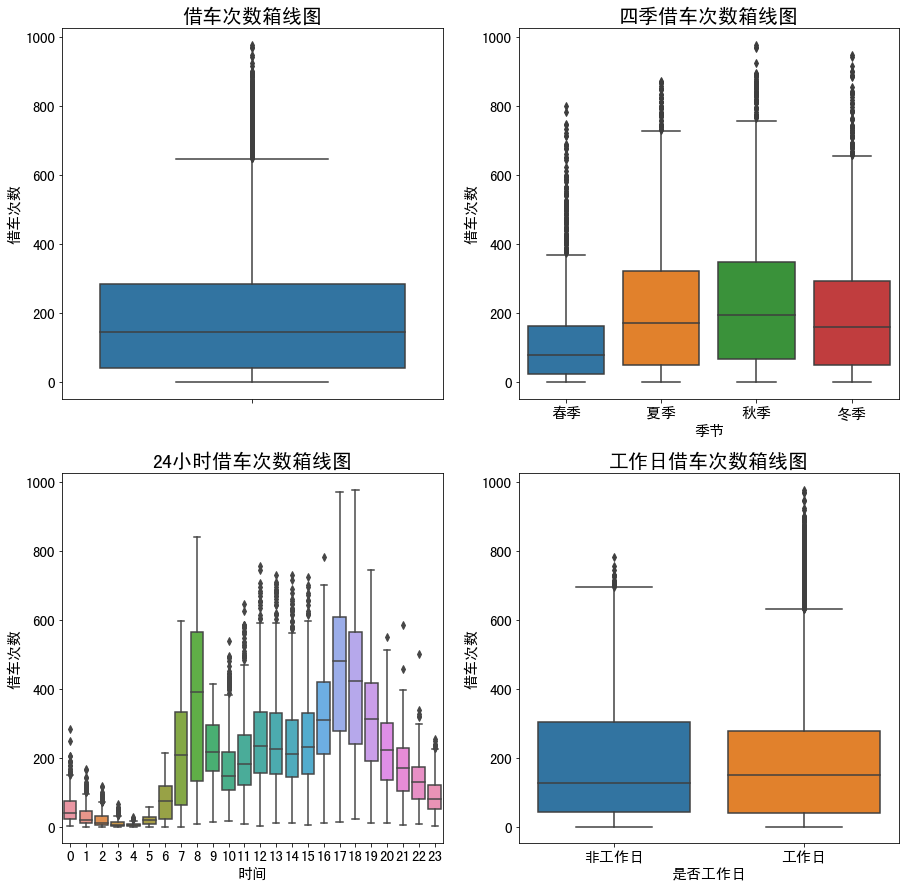

In [15]:
#异常值可视化
fig,axes = plt.subplots(2, 2,figsize=(15,15)) 
sns.boxplot(y='count',data=train,ax=axes[0][0])
sns.boxplot(x='season',y='count',data=train,ax=axes[0][1])
sns.boxplot(x='hour',y='count',data=train,ax=axes[1][0])
sns.boxplot(x='workingday',y='count',data=train,ax=axes[1][1])


#设置属性

#设置标题
axes[0][0].set_title('借车次数箱线图',fontsize=20)
axes[0][1].set_title('四季借车次数箱线图',fontsize=20)
axes[1][0].set_title('24小时借车次数箱线图',fontsize=20)
axes[1][1].set_title('工作日借车次数箱线图',fontsize=20)

#设置x轴和y轴标签的属性
axes[0][0].set_ylabel('借车次数',fontsize=15)
axes[0][1].set_xlabel('季节',fontsize=15)
axes[0][1].set_ylabel('借车次数',fontsize=15)
axes[1][0].set_xlabel('时间',fontsize=15)
axes[1][0].set_ylabel('借车次数',fontsize=15)
axes[1][1].set_xlabel('是否工作日',fontsize=15)
axes[1][1].set_ylabel('借车次数',fontsize=15)

#设置x轴y轴刻度属性
axes[0][0].tick_params(axis='y',labelsize=15) 
axes[0][1].tick_params(axis='x',labelsize=15) 
axes[0][1].tick_params(axis='y',labelsize=15) 
axes[1][0].tick_params(axis='x',labelsize=15) 
axes[1][0].tick_params(axis='y',labelsize=15) 
axes[1][1].tick_params(axis='x',labelsize=15) 
axes[1][1].tick_params(axis='y',labelsize=15) 

### 小结
* 由借车次数箱线图，不难发现，数据集中存在较多的异常值；
* 春季借车次数的中位数要远低于其他季节；
* 借车次数在早上7、8点以及晚上5、6点较多，正好处在上下班高峰期；
* 非工作日较工作日借车次数要多，此时，人们有更多的时间骑车出门游玩。

In [16]:
#计算异常值范围
Percentile = np.percentile(train['count'],[0,25,50,75,100])
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3]+IQR*1.5
DownLimit = Percentile[1]-IQR*1.5
print(UpLimit,DownLimit)

647.0 -321.0


In [17]:
#删除异常值
print('剔除异常值之前 的数据集大小：',train.shape)
print('剔除异常值之前 的数据集大小：',train.index)
train_delete_outlier=train[train['count']<=UpLimit].reset_index(drop=True)
print('剔除异常值之前 的数据集大小：',train_delete_outlier.shape)
print('剔除异常值之前 的数据集大小：',train_delete_outlier.index)

剔除异常值之前 的数据集大小： (10886, 15)
剔除异常值之前 的数据集大小： RangeIndex(start=0, stop=10886, step=1)
剔除异常值之前 的数据集大小： (10586, 15)
剔除异常值之前 的数据集大小： RangeIndex(start=0, stop=10586, step=1)


## 3.2 数值型变量相关性及可视化分析

### 将数值类型的变量选出来

In [18]:
train_select=train_delete_outlier.loc[:,['temp','atemp','humidity','windspeed','casual','registered','count']]

### 计算相关系数矩阵

In [19]:
corrDf=train_select.corr()
corrDf

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.985887,-0.051216,-0.021912,0.468614,0.304585,0.388065
atemp,0.985887,1.000000,-0.030373,-0.062398,0.463624,0.302263,0.384680
humidity,-0.051216,-0.030373,1.000000,-0.319719,-0.335296,-0.274223,-0.323363
windspeed,-0.021912,-0.062398,-0.319719,1.000000,0.088725,0.102881,0.110181
casual,0.468614,0.463624,-0.335296,0.088725,1.000000,0.513744,0.717512
registered,0.304585,0.302263,-0.274223,0.102881,0.513744,1.000000,0.966215
count,0.388065,0.384680,-0.323363,0.110181,0.717512,0.966215,1.000000


### 绘制相关系数热力图

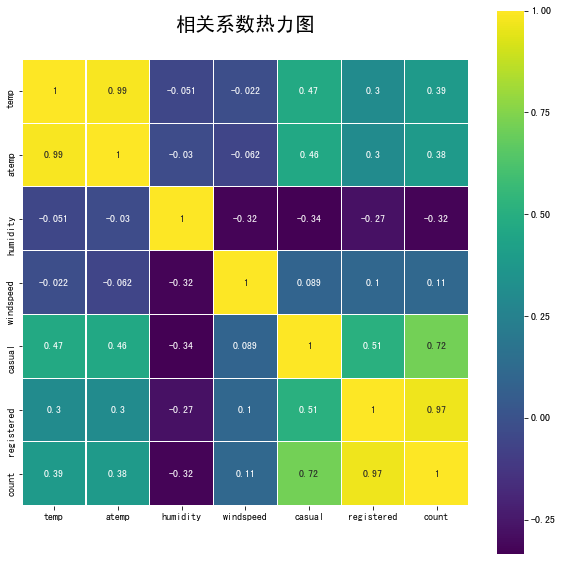

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('相关系数热力图', y=1.05, size=20)
sns.heatmap(train_select.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white',annot=True)

### 小结
* 气温，体感温度以及风速与借车次数呈正相关，湿度与借车次数呈负相关，从热力图上我们可以发现，风速对借车次数基本上没有什么影响；
* 气温和体感温度相关性较强，为避免后续建模过程中的数据冗余，我们只需选择其中一个即可；
* 借车次数本来就是通过注册用户和未注册用户产生的，所以在建模过程中，我们要舍弃这两个变量。

### 绘制散点图

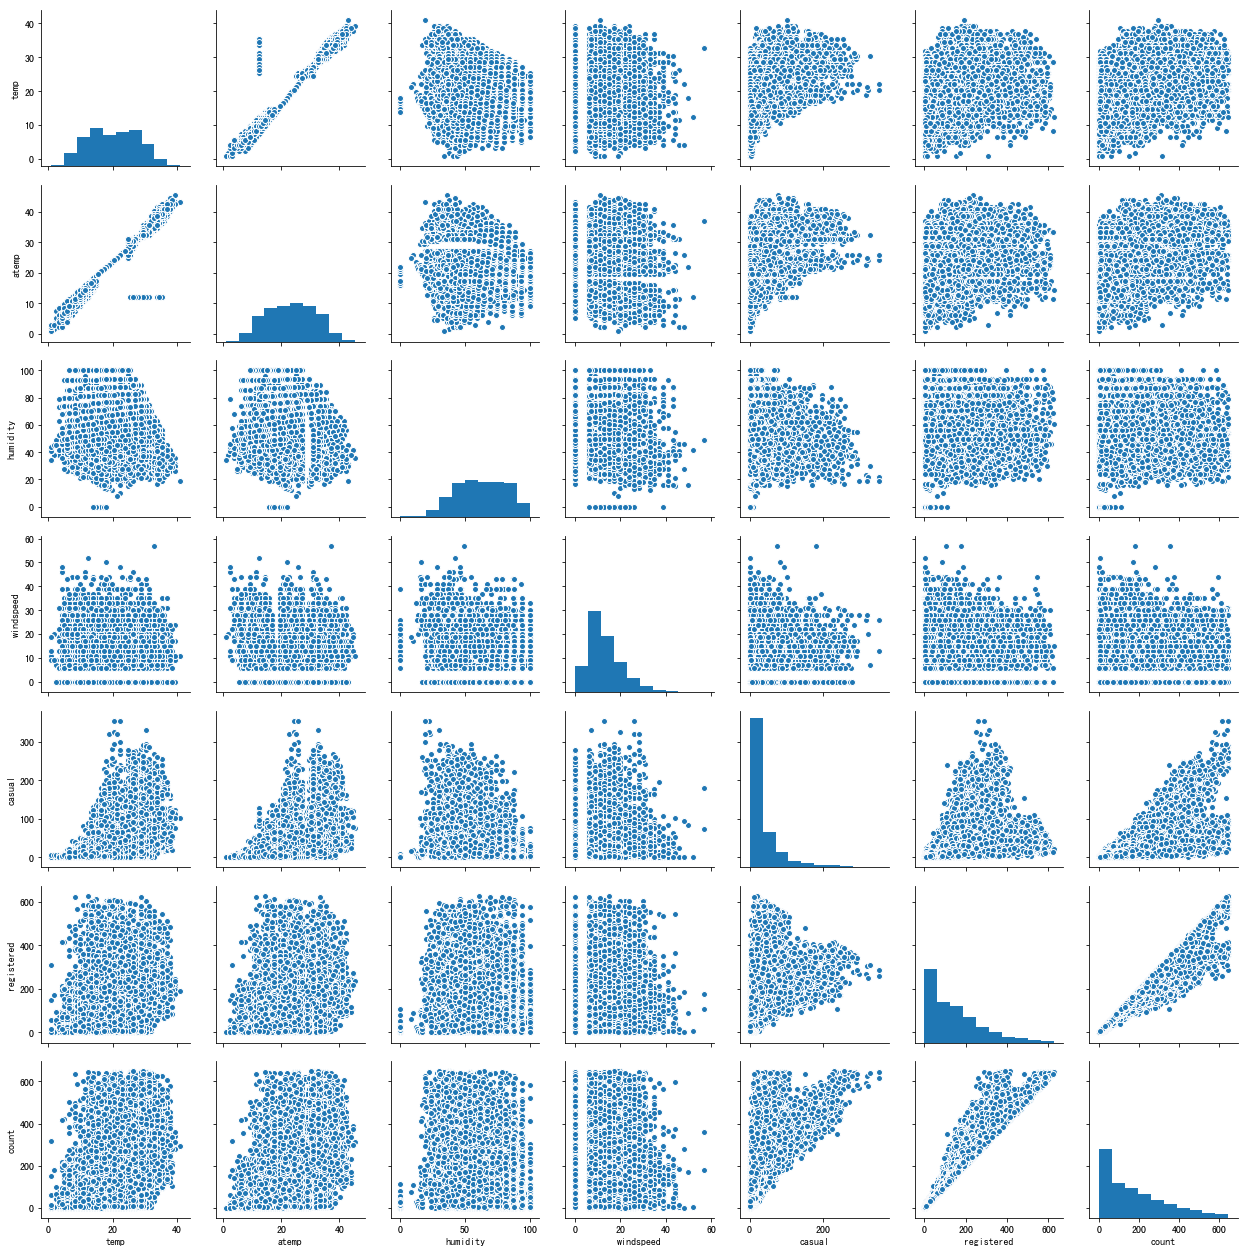

In [21]:
sns.pairplot(train_select)

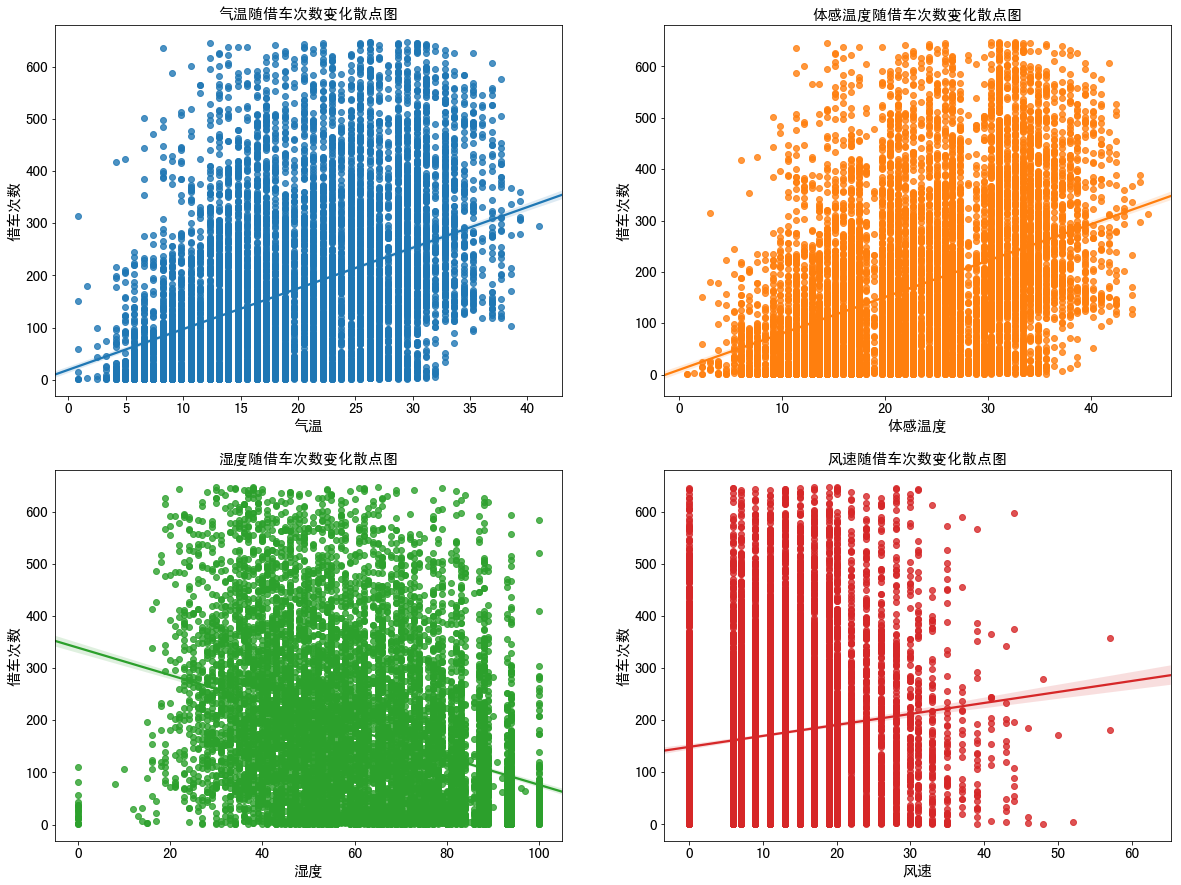

In [22]:
#绘制变量temp,atemp,humidity,windspreed,count两两之间的散点图
fig,axes=plt.subplots(2,2,figsize=(20,15))
sns.regplot(x='temp',y='count',data=train_select,ax=axes[0][0])
sns.regplot(x='atemp',y='count',data=train_select,ax=axes[0][1])
sns.regplot(x='humidity',y='count',data=train_select,ax=axes[1][0])
sns.regplot(x='windspeed',y='count',data=train_select,ax=axes[1][1])
#设置标题属性
axes[0][0].set_title('气温随借车次数变化散点图',fontsize=15)
axes[0][1].set_title('体感温度随借车次数变化散点图',fontsize=15)
axes[1][0].set_title('湿度随借车次数变化散点图',fontsize=15)
axes[1][1].set_title('风速随借车次数变化散点图',fontsize=15)
#设置坐标轴标签属性
axes[0][0].set_xlabel('气温',fontsize=15)
axes[0][0].set_ylabel('借车次数',fontsize=15)
axes[0][1].set_xlabel('体感温度',fontsize=15)
axes[0][1].set_ylabel('借车次数',fontsize=15)
axes[1][0].set_xlabel('湿度',fontsize=15)
axes[1][0].set_ylabel('借车次数',fontsize=15)
axes[1][1].set_xlabel('风速',fontsize=15)
axes[1][1].set_ylabel('借车次数',fontsize=15)
#设置坐标轴刻度属性
axes[0][0].tick_params(axis='x',labelsize=15) 
axes[0][0].tick_params(axis='y',labelsize=15) 
axes[0][1].tick_params(axis='x',labelsize=15) 
axes[0][1].tick_params(axis='y',labelsize=15) 
axes[1][0].tick_params(axis='x',labelsize=15) 
axes[1][0].tick_params(axis='y',labelsize=15) 
axes[1][1].tick_params(axis='x',labelsize=15) 
axes[1][1].tick_params(axis='y',labelsize=15) 

### 小结
* 借车次数随温度的升高而增加，但超过一定温度，即过于炎热时，借车次数会有一定程度的降低；
* 借车次数随湿度的升高而逐渐减少；
* 借车次数随风速的升高而逐渐增多，但增幅不显著，且风速过高时，借车次数会逐渐减少。

## 3.3 分类变量可视化分析

### 月份

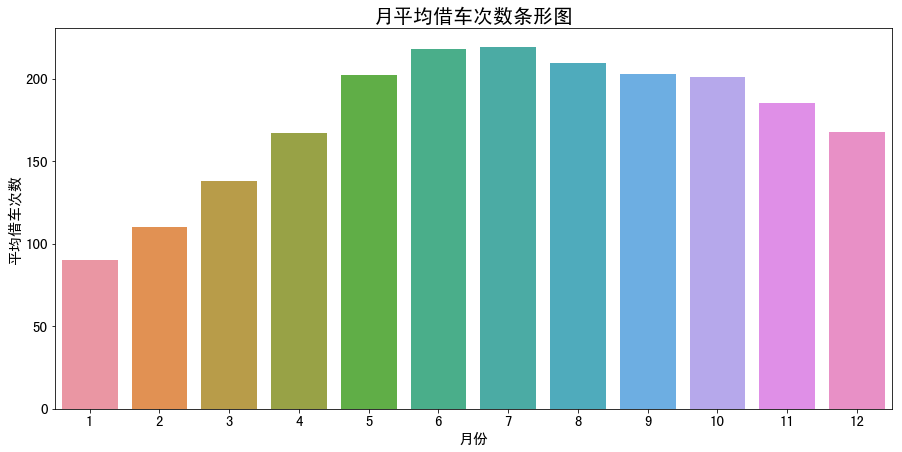

In [23]:
fig,ax=plt.subplots(figsize=(15,7))
sns.barplot(x='month', y='count', data=train_delete_outlier,ci=0)
#设置标题属性
ax.set_title('月平均借车次数条形图',fontsize=20)
#设置坐标轴标签属性
ax.set_xlabel('月份',fontsize=15)
ax.set_ylabel('平均借车次数',fontsize=15)
#设置坐标轴刻度属性
ax.tick_params(axis='x',labelsize=15) 
ax.tick_params(axis='y',labelsize=15) 

### 小结
相比于其他月份，从5月至10月借车次数一直保持在较高的水平。

### 季节

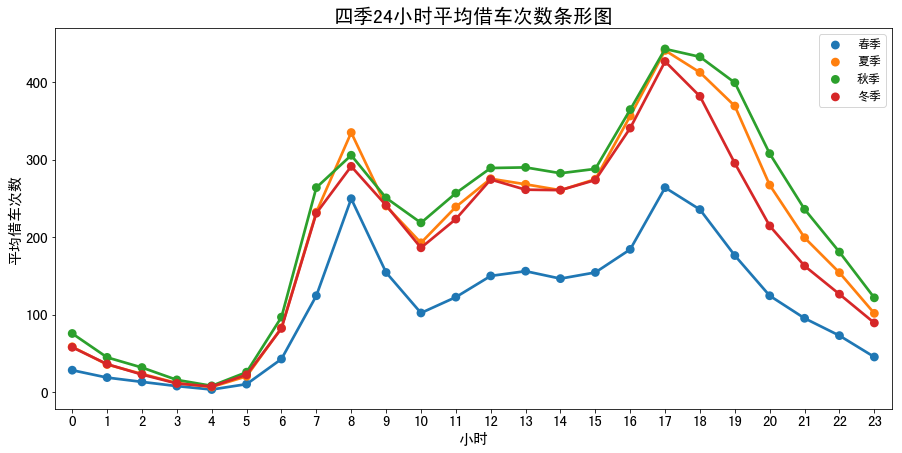

In [24]:
fig,ax=plt.subplots(figsize=(15,7))
sns.pointplot(x='hour', y='count',hue='season', label='四季',data=train_delete_outlier,ci=0)

#设置标题属性
ax.set_title('四季24小时平均借车次数条形图',fontsize=20)
#设置坐标轴标签属性
ax.set_xlabel('小时',fontsize=15)
ax.set_ylabel('平均借车次数',fontsize=15)
#设置坐标轴刻度属性
ax.tick_params(axis='x',labelsize=15) 
ax.tick_params(axis='y',labelsize=15) 
#设置图例属性
ax.legend(loc='upper right',fontsize=12)

### 小结
* 早上7、8点以及晚上5、6点，此时正好处在上下班高峰期，借车次数较多；
* 秋季冷热适宜，益于出行，借车人数最多；而冬季天气寒冷，骑车不太方便，借车的人数最少。

### 天气

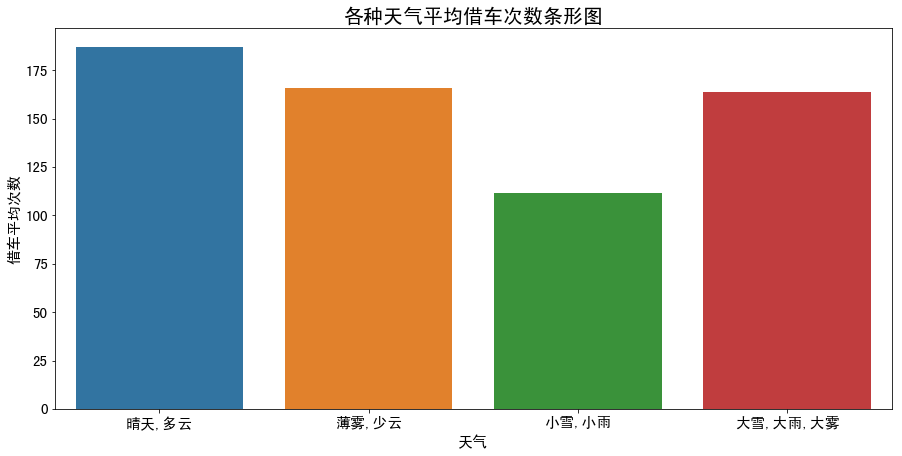

In [27]:
fig,ax=plt.subplots(figsize=(15,7))
sns.barplot(x='weather', y='count', data=train_delete_outlier,ci=0)
#设置标题属性
ax.set_title('各种天气平均借车次数条形图',fontsize=20)
#设置坐标轴标签属性
ax.set_xlabel('天气',fontsize=15)
ax.set_ylabel('借车平均次数',fontsize=15)
#设置坐标轴刻度属性
ax.tick_params(axis='x',labelsize=15) 
ax.tick_params(axis='y',labelsize=15) 

### 小结
天气较好时，借车次数较多；天气恶劣时，借车次数较少。

### 星期

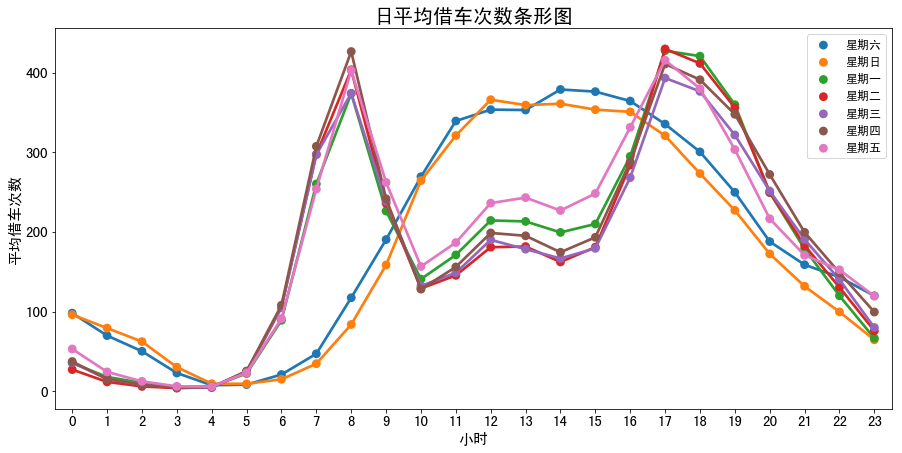

In [25]:
#星期各个小时
fig,ax=plt.subplots(figsize=(15,7))
sns.pointplot(x='hour', y='count',hue='weekday', data=train_delete_outlier,ci=0)
#设置标题属性
ax.set_title('日平均借车次数条形图',fontsize=20)
#设置坐标轴标签属性
ax.set_xlabel('小时',fontsize=15)
ax.set_ylabel('平均借车次数',fontsize=15)
#设置坐标轴刻度属性
ax.tick_params(axis='x',labelsize=15) 
ax.tick_params(axis='y',labelsize=15)
#设置图例属性
ax.legend(loc='upper right',fontsize=12)

### 小结
* 上下班高峰期间，周内较周末借车次数多；其他时间，周内比周末借车次数多。

### 注册用户

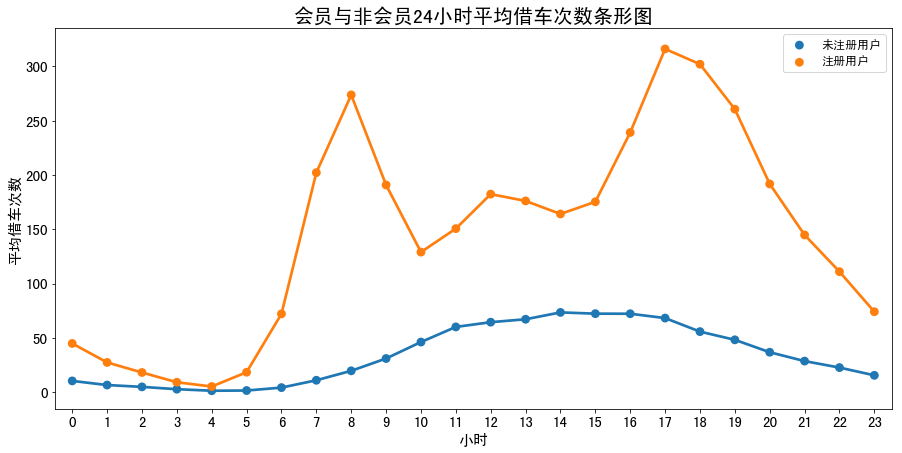

In [26]:
#对casual和registered列进行重命名
train_delete_outlier_tra=train_delete_outlier.rename(columns={'casual':'未注册用户','registered':'注册用户'})
fig,ax=plt.subplots(figsize=(15,7))
melt1dataframe=pd.melt(train_delete_outlier_tra[['hour','未注册用户','注册用户']],id_vars=['hour'],value_vars=['未注册用户','注册用户'],var_name='usertype',value_name='borrowcount')
groupby1=melt1dataframe.groupby(['hour','usertype'])['borrowcount'].mean().reset_index()
sns.pointplot(x='hour', y='borrowcount',hue='usertype', data=groupby1,ci=0)
#设置标题属性
ax.set_title('会员与非会员24小时平均借车次数条形图',fontsize=20)
#设置坐标轴标签属性
ax.set_xlabel('小时',fontsize=15)
ax.set_ylabel('平均借车次数',fontsize=15)
#设置坐标轴刻度属性
ax.tick_params(axis='x',labelsize=15) 
ax.tick_params(axis='y',labelsize=15) 
#设置图例属性
ax.legend(loc='upper right',fontsize=12)

### 小结
* 注册用户较未注册用户借车的次数要多，且其借车时间主要集中在上下班高峰期。